# Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

This project aims to compare different manifold learning algorithms using the CIFAR-10 dataset.

Manifold learning algorithms are a type of dimensionality reduction methods that are used to uncover the low dimensional manifold that is within a higher dimension, and ultimately discover the intrinsic structure and relationships of the data.

The algorithms used in this project will be:
- PCA
- Isomap Embedding
- Locally Linear Embedding
- Multidimensional Scaling
- Spectral Embedding
- t-SNE
- UMAP

The dataset used will be CIFAR-10, which contains ten classes of color images classified as cat, horse, frog, dog, truck, ship, deer, bird, automobile, and airplane.

## EDA + Preprocessing

As always, I will begin by installing / importing necessary libraries, downloading the dataset, and taking a look at some of the images.

In [60]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install torchvision --user


Note: you may need to restart the kernel to use updated packages.


In [62]:
# import all necessary libraries
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
import umap.umap_ as umap
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# load in CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


Now that everything is loaded in, lets take a look at some of the images in the dataset.

Label: 6


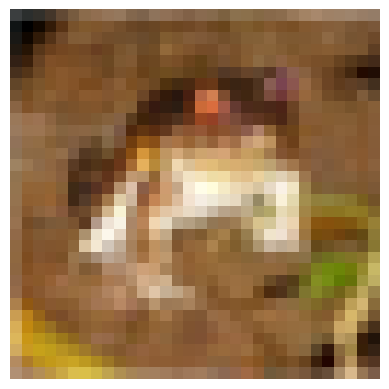

Label: 9


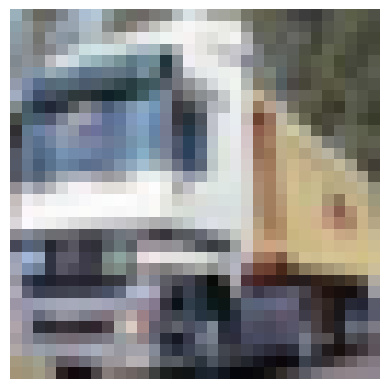

Label: 9


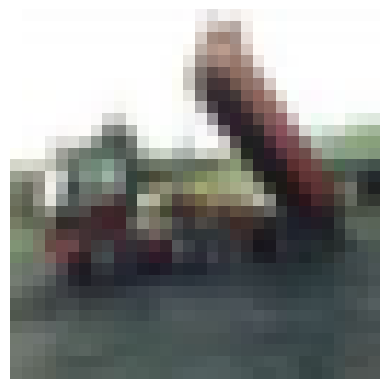

Label: 4


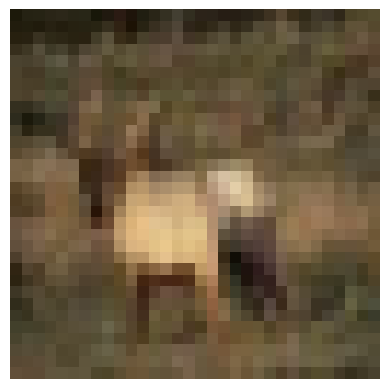

Label: 1


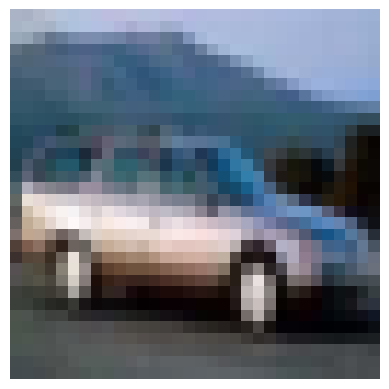

In [64]:
def show_image(image):
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

for i in range(5):
    image, label = dataset[i]
    print(f"Label: {label}")
    show_image(image)

It looks like some of the data in this dataset is very low resolution images of things like cars, trucks, and what looks like some animals.

Now I will reduce the size of data from the dataset so that the following dimensionality reduction techniques will run faster.

In [65]:
# extract data and labels
train_data = dataset.data[:1000]
train_labels = dataset.targets[:1000]

And I will also flatten it into two dimensions.

In [66]:
# flatten images
train_flat = train_data.reshape(train_data.shape[0], -1)

In [67]:
print(train_flat)

[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [145 148 157 ... 126 160  91]
 [146 146 146 ... 238 238 238]
 [203 206 208 ... 132 131 126]]


## Principle Component Analysis

Principle Component Analysis is a form of linear dimensionality reduction. It works by calculating the covariance matrix, performing eigenvalue decomposition on the matrix, and selecting the eigenvector with the largest eigenvalue as the principal component.

In [68]:
# instantiate and train
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_flat)

In [69]:
classes = np.unique(train_labels)

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'lime']

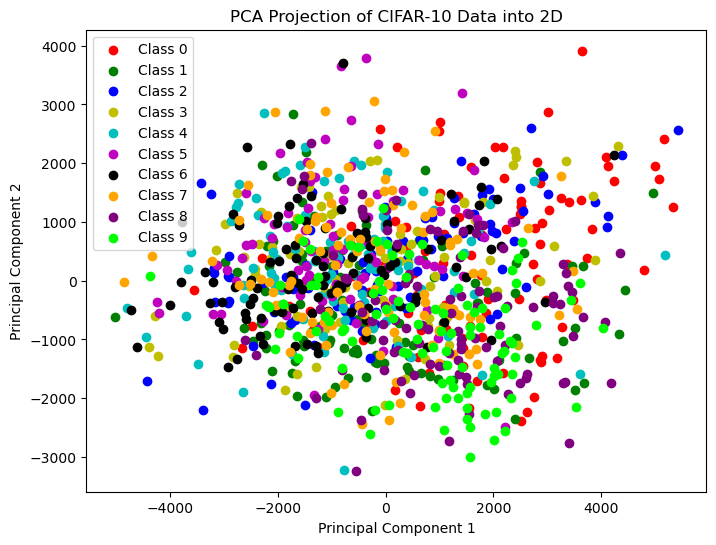

In [70]:
# Plot the data points colored by class labels
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_pca[train_labels == class_label, 0], train_pca[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')

plt.title('PCA Projection of CIFAR-10 Data into 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Isomap Embedding

Isometric Mapping Embedding is a technique for dimensionality reduction that differs from others in that it first constructs a neighborhood graph, computes the distances between the points, then applies multidimensional scaling to the distance matrix to find the points in the lower dimensional space that best represent the original distances. 

In [71]:
iso = Isomap(n_components=2, n_jobs = 1)
train_iso = iso.fit_transform(train_flat)

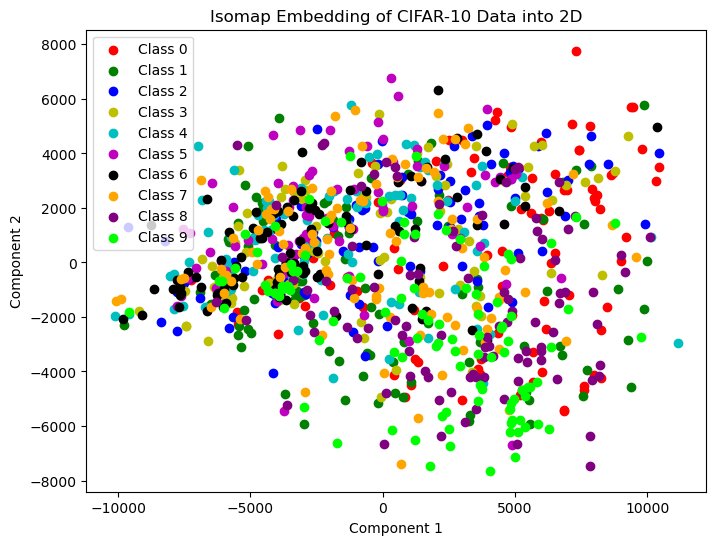

In [72]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_iso[train_labels == class_label, 0], train_iso[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')
    
plt.title('Isomap Embedding of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## Locally Linear Embedding

Local Linear Embedding is a nonlinear dimensionality reduction technique that works by first finding the k-nearest neighbors, finding the best weights for each point, then the eigenvectors of the weight matrix are computed to represent it in a lower dimension. The top eigenvectors are then selected.

In [73]:
lle = LocallyLinearEmbedding(n_components=2, n_jobs = 1)
train_lle = lle.fit_transform(train_flat)

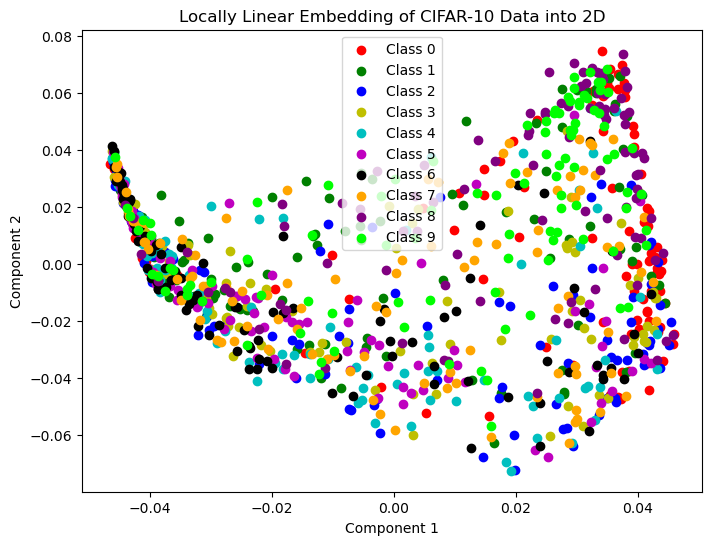

In [74]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_lle[train_labels == class_label, 0], train_lle[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')
plt.title('Locally Linear Embedding of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## Multidimensional Scaling

Multidimensional Scaling is another form of dimensionality reduction. It prioritizes the distance between the points more than the actual X and Y values, and its rotation on a graph. Then embeds it into a lower dimensional space (still preserving the pairwise distances). It outputs a set of coordinates for each data point in a lower dimensional space that can be visualized by plotting.

In [75]:
mds = MDS(n_components=2)
train_mds = mds.fit_transform(train_flat)

c:\Users\esthe\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


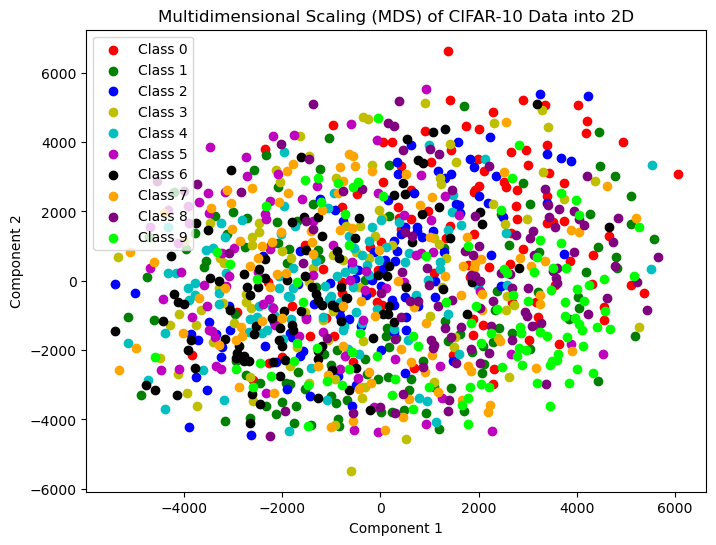

In [76]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_mds[train_labels == class_label, 0], train_mds[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')
plt.title('Multidimensional Scaling (MDS) of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## Spectral Embedding

Spectral Embedding begins by first constructing a similarity matrix, then computing the laplacian matrix that captures the connectivity of the data. Next, the laplacian matrix is decomposed into its eigenvectors which represent the coordinates in lower dimensional space and the eigenvalues represent the importance of each eigenvector.

In [77]:
se = SpectralEmbedding(n_components=2)
train_se = se.fit_transform(train_flat)

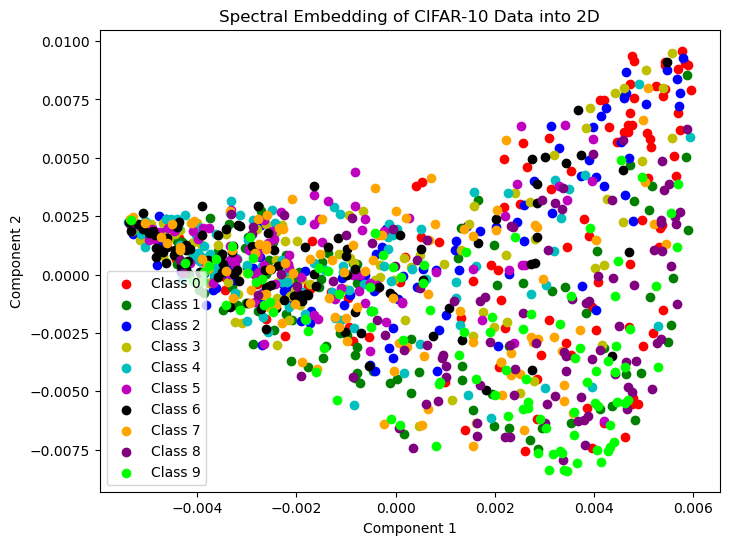

In [78]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_se[train_labels == class_label, 0], train_se[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')
plt.title('Spectral Embedding of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## T-distributed Stochastic Neighbor Embedding

T-SNE is another nonlinear dimensionality reduction technique. First, the pairwise similarities are computed, then a probability distribution is created from that to represent the relationships between points. Then another probability distribution is constructed but in a lower dimension. The Kullback-Leibeler divergence between the high and low dimensional distributions is minimized to preserve the local and global structure of the data. The coordinates of each point in the lower dimensional space can then be plotted.

In [79]:
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(train_flat)

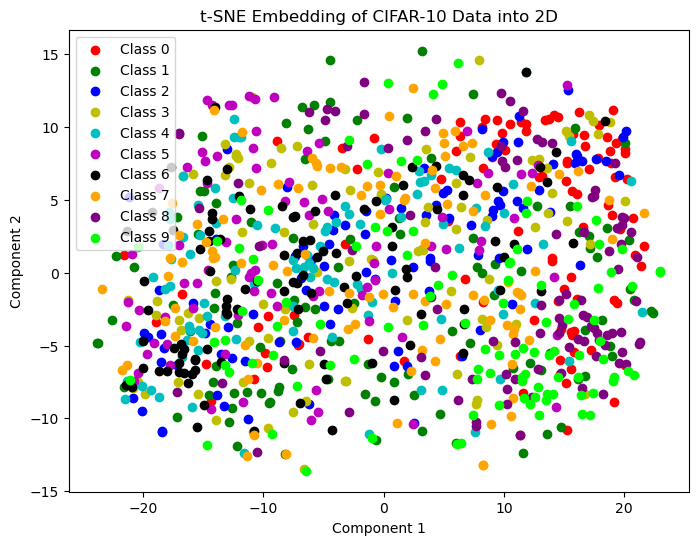

In [80]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    plt.scatter(train_tsne[train_labels == class_label, 0], train_tsne[train_labels == class_label, 1],
                c=colors[i], label=f'Class {class_label}')
plt.title('t-SNE Embedding of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## UMAP

Unifold Manifold Approximation and Projection is similar to t-SNE in that it can also preserve the global structure of the data and not just the local structure, however, it is much more computationally efficient. It works by creating a fuzzy topological representation for n-nearest neighbors of each point, then optimizing the low dimensional representation to match the fuzzy representation as much as possible (done with stochastic gradient descent).

In [88]:
umap = umap.UMAP(n_components=2)
train_umap = umap.fit_transform(train_flat)

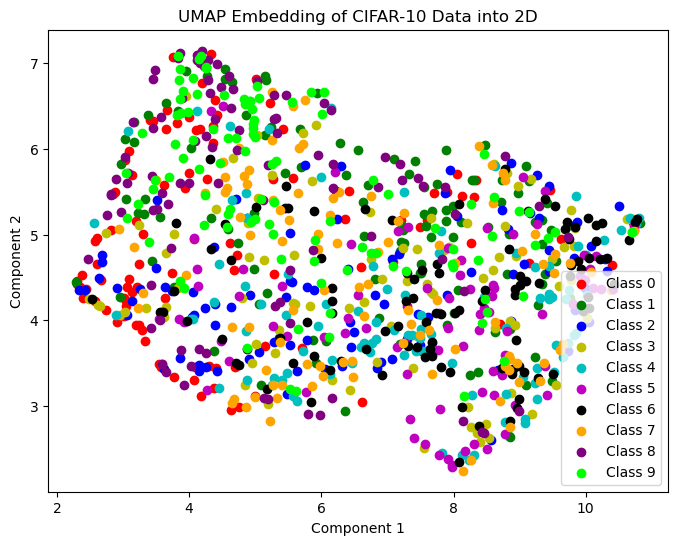

In [90]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    class_indices = np.where(train_labels == class_label)[0]  # Get indices of data points belonging to the class
    plt.scatter(train_umap[class_indices, 0], train_umap[class_indices, 1],
                c=colors[i], label=f'Class {class_label}')

plt.title('UMAP Embedding of CIFAR-10 Data into 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

## Conclusion

Dimensionality reduction is a critical step in a ML pipeline as it reduces the number or irrelevant features, decreases the ability of a model to overfit, and improves its generalizability. 

There are many different types of ways that one can go about reducing the dimensions of their dataset. In this case, we applied a variety of these techniques to color images to the CIFAR-10 to project them into a lower dimension. 

While they are all similar in that they contain steps to reduce dimensions into lower ones, they all slightly differ in how they represent the relationships between points. For example, some may use covariance matrices, distance matrices, nearest neighbors, etc.

As a result many of these techniques will produce slightly different results, as demonstrated in the plots above, and picking the optimal dimensionality reduction method will be dependent on the structure of the data, as well as the desired outcome.